In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Company = pd.read_csv("50_Startups.csv")
Company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

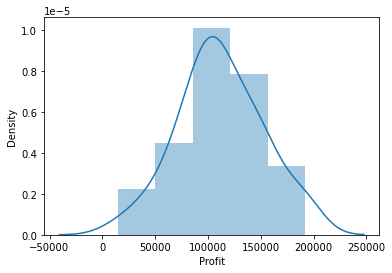

In [3]:
sns.distplot(Company['Profit'],bins=5,kde=True)

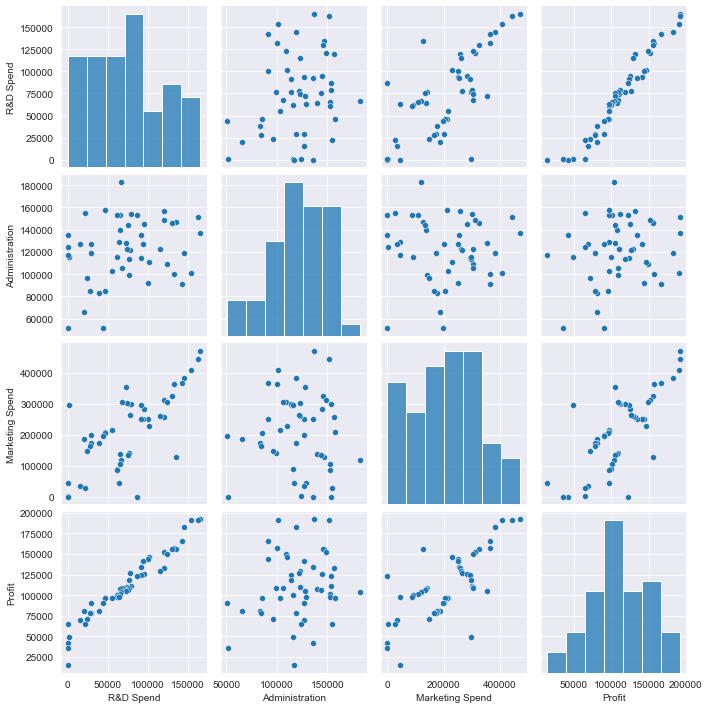

In [4]:
sns.set_style(style='darkgrid')
sns.pairplot(Company)

<AxesSubplot:xlabel='State', ylabel='Profit'>

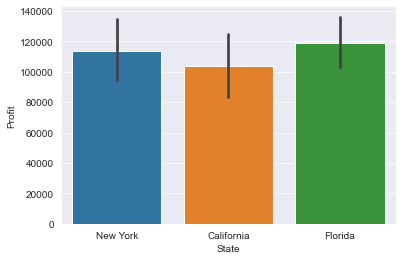

In [5]:
sns.barplot(x='State',y='Profit',data=Company)


In [6]:
Company.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
X = Company.iloc[:,:-1].values

In [8]:
y = Company.iloc[:,-1].values

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('encoder',OneHotEncoder(),[3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
df

,Actual Values,Predicted Values
0,49490.75,53671.364776
1,89949.14,89285.977520
2,97427.84,98433.343687
3,191792.06,188193.839077
4,90708.19,73092.951376
5,141585.52,127287.060592
6,77798.83,73067.924625
7,65200.33,63565.312088
8,134307.35,126602.959404
9,101004.64,101601.100440


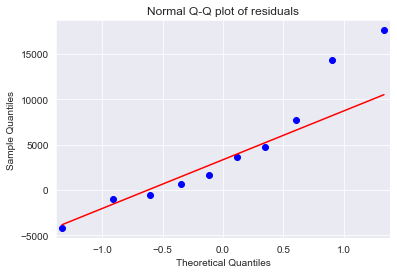

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot((y_test-y_pred),line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

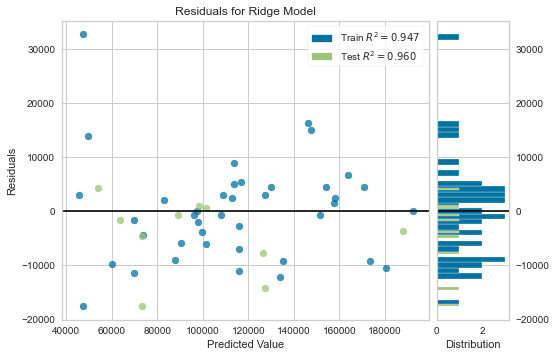

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

vis = Ridge()
visualizer = ResidualsPlot(vis)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure